In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
fs = 100
duration = 10
t = np.linspace(0, duration, fs * duration)


def sine_wave(time, Amplitude, frequency, phase):
    """
    Generate a sine wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    Amplitude : float
        The peak deviation of the function from zero.
    frequency : float
        The number of oscillations (cycles) that occur each second of time.
    phase : float
        Phase specifies (in radians) where in its cycle the oscillation is at t = 0.

    Returns:
    sine_wave : array-like
        An array containing the values of the sine wave signal at the given time points.

    """

    return Amplitude * np.sin(2 * np.pi * frequency * time + phase)

def triangle_wave(time, Amplitude, period):
    """
    Generate a triangle wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    Amplitude : float
        The amplitude of the triangle wave.
    period : float
        The period of the triangle wave.

    Returns:
    triangle_wave : array-like
        An array containing the values of the triangle wave signal at the given time points.
    """

    # Scale the time values to a normalized range [-1, 1] within each period
    t_scaled = 1 * np.abs(2 * (time / period - np.floor(time / period + 0.5))) - 1
    
    # Calculate the triangle wave values based on scaled time values
    triangle_wave = (3 * Amplitude / period) * np.abs((t_scaled - period / 4) % period - period / 2) - Amplitude
    
    return triangle_wave

def square_wave(time, frequency):
    """
    Generate a square wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    frequency : float
        The frequency of the square wave.

    Returns:
    square_wave : array-like
        An array containing the values of the square wave signal at the given time points.
    """
    square_wave = 2 * (2 * np.floor(frequency * time) - np.floor(2 * frequency * time)) + 1
    
    return square_wave


def chirp_wave_linear(time, f0, c, phase):
    """
    Generate a linear chirp wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    f0 : float
        Initial frequency of the chirp.
    c : float
        Chirp rate (slope) in Hertz/second.
    phase : float
        Phase offset of the chirp.

    Returns:
    chrip_wave_linear : array-like
        An array containing the values of the linear chirp wave signal at the given time points.
    """
    return np.sin(phase + 2 * np.pi * ((c / 2) * (time ** 2) + f0 * time))

def chirp_wave_exponential(time, f0, k, phase):
    """
    Generate an exponential chirp wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    f0 : float
        Initial frequency of the chirp.
    k : float
        Exponential growth factor.
    phase : float
        Phase offset of the chirp.

    Returns:
    chirp_wave_exponential : array-like
        An array containing the values of the exponential chirp wave signal at the given time points.
    """
    return np.sin(phase + 2 * np.pi * f0 * ((k ** time - 1) / np.log(k)))

def chirp_wave_hyperbolic(time, f0, f1, duration, phase):
    """
    Generate a hyperbolic chirp wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    f0 : float
        Initial frequency of the chirp.
    f1 : float
        Final frequency of the chirp.
    duration : float
        Duration of the chirp.
    phase : float
        Phase offset of the chirp.

    Returns:
    chirp_wave_hyperbolic : array-like
        An array containing the values of the hyperbolic chirp wave signal at the given time points.
    """
    return np.sin(phase + 2 * np.pi * ((-1 * f0 * f1 * duration) / (f1 - f0) * np.log(1 - (f1 - f0) / (f1 * duration) * time)))

# def chirp_wave_linear(time, f0, c, phase):
#     return np.sin(phase + 2 * np.pi * ((c / 2)* (time**2) + f0*time))

# def chirp_wave_exponential(time, f0, k, phase):
#     return np.sin(phase + 2 * np.pi * f0 * ( (k ** time - 1) / np.log(k)))

# def chirp_wave_hyperbolic(time, f0, f1, duration, phase):
#     return np.sin(phase + 2 * np.pi * ( (-1 * f0 * f1 * duration ) / (f1 - f0) * np.log(1 - (f1-f0)/(f1 * duration)*time)))
         

# def pulse_wave(time, Amplitude, d, frequency, expansion):
#     sum_of_ = 0
#     for n in range(1, expansion+1):
#         sum_of_ += np.sinc(n * d) * np.cos(2 * np.pi * n * frequency * time)
#     pulse_wave = Amplitude * d * (1 + 2 * sum_of_)

#     return pulse_wave

def pulse_wave(time, Amplitude, d, frequency, expansion):
    """
    Generate a pulse wave signal.

    Parameters:
    time : array-like
        The time values at which the signal is evaluated.
    Amplitude : float
        The amplitude of the pulse wave.
    d : float
        Width of the pulse.
    frequency : float
        The frequency of the pulse wave.
    expansion : int
        The number of terms used in the expansion for generating the pulse wave.

    Returns:
    pulse_wave : array-like
        An array containing the values of the pulse wave signal at the given time points.
    """
    sum_of_ = 0
    for n in range(1, expansion+1):
        sum_of_ += np.sinc(n * d) * np.cos(2 * np.pi * n * frequency * time)

    return Amplitude * d * (1 + 2 * sum_of_)

# plt.plot(sine_wave)

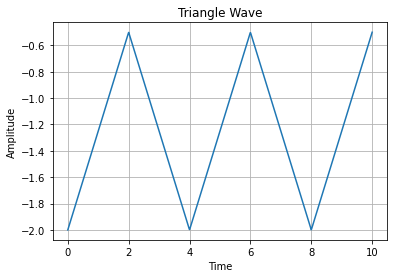

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# def triangle_wave(t, a, p):
#     t_scaled = (2 * t / p) - 1  # Scaling t to the range [-1, 1]
#     triangle = a * (1 - np.abs(t_scaled % 2 - 1))  # Triangle wave equation
#     return triangle

# def triangle_wave(t, a, p):

#     """
    
#     a triangle wave with amplitude a and period p
#     """
#     t_scaled = 1 * np.abs( 2 * ( t / p - np.floor(t / p + 0.5))) -1
#     triangle = (3 * a / p) * np.abs( ( t_scaled - p/4) % p - p / 2 ) - a
#     return triangle


# Example usage
amplitude = 2.0
period = 4
time_values = np.linspace(0, 10, 1000)  # Time values from 0 to 10 seconds
triangle_values = triangle_wave(time_values, amplitude, period)

plt.plot(time_values, triangle_values)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Triangle Wave')
plt.grid(True)
plt.show()


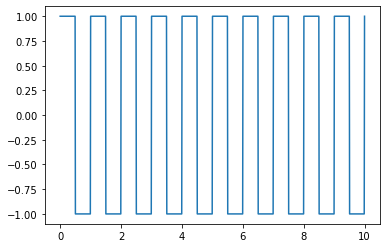

In [45]:
# def square_wave(t, f):

    # """
    
    # a triangle wave with amplitude a and period p
    # """

    # return (-1)^(np.floor(2 * f * t))
    # squares = 2 * (2 * np.floor( f * t) - np.floor(2 * f * t)) + 1
    # return squares


plt.plot(time_values, square_wave(time_values, 1))


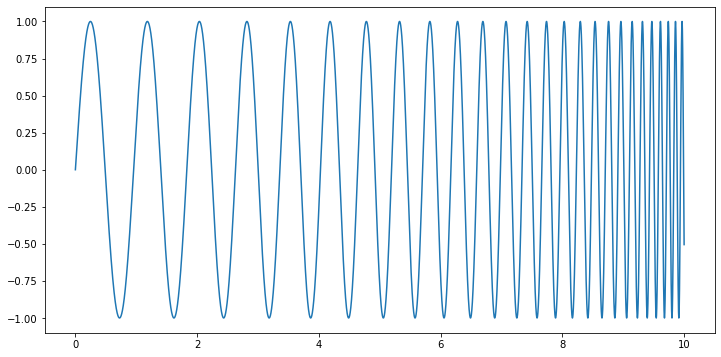

In [36]:
# linear f0, t, c, phi0
# exponential f0, phi0, k, t
# hyperbolic f0, f1, t, T, phi0


def chirp_wave_linear(t, f0, c, phase):
    return np.sin(phase + 2 * np.pi * ((c / 2)* t * t + f0*t))

def chirp_wave_exponential(t, f0, k, phase):
    return np.sin(phase + 2 * np.pi * f0 * ( (k ** t - 1) / np.log(k)))

def chirp_wave_hyperbolic(t, f0, f1, t, phase):
    return np.sin(phase + 2 * np.pi * ( (-1 * f0 * f1 * t ) / (f1 - f0) * np.log(1 - (f1-f0)/(f1 * t)*t)))
                  
# def chirp_wave(time, f0, phase, model, rate=None, f1=None, T=None):


# plt.plot(time_values, chirp_wave(time_values, 1, 0, 0))
plt.figure(figsize=(12,6))
time_values = np.linspace(0, 10, 100000)  # Time values from 0 to 10 seconds
plt.plot(time_values, chirp_wave_hyperbolic(time_values, 1, 10, 10, 0))
# 


In [32]:
np.log()

SyntaxError: invalid syntax (2019121372.py, line 1)

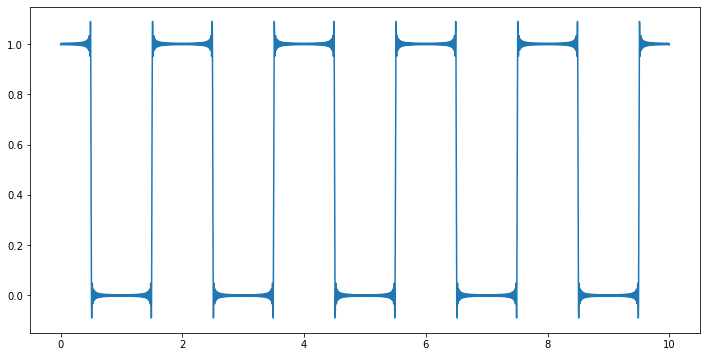

In [46]:
# def pulse_wave(t, A, d, f, expansion):
#     sum_of_ = 0
#     for n in range(1, expansion+1):
#         sum_of_ += np.sinc(n * d) * np.cos(2 * np.pi * n * f * t)

#     return A * d * (1 + 2 * sum_of_)

plt.figure(figsize=(12,6))
time_values = np.linspace(0, 10, 100000)  # Time values from 0 to 10 seconds
plt.plot(time_values, pulse_wave(time_values, 1, 0.5, 0.5, 100))
# 